# Texas Licenses

I originally got this dataset from the [License Files page](https://www.license.state.tx.us/licensesearch/licfile.asp) from the Texas Department of Licensing and Regulation, but they've changed around since then! I'm pretty sure it's [this dataset](https://www.opendatanetwork.com/dataset/data.texas.gov/7358-krk7), but we'll just use a local version instead of the most current.

# PART ONE: OPENING UP OUR DATASET

## 0. Do your setup

Import what you need to import, etc.

In [1]:
import pandas as pd
import numpy as np

/Users/sheridanwall/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## 1. Open the file

We'll start with `licfile.csv`, which is a list of licenses.

In [2]:
df = pd.read_csv("licfile.csv")
df.head()

/Users/sheridanwall/.pyenv/versions/3.8.2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (1,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,08102017,"RISINGER, JIM MARVIN.1",7668 S US HWY 59,Unnamed: 11,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,Unnamed: 17,N
0,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,12292017,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,183.0,GREGG,75662,9039187899,NaN,N
1,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,9262017,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,493.0,WILSON,78147,NaN,NaN,N
2,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,11042017,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,201.0,HARRIS,77076,7136445566,NaN,N
3,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2252018,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,27.0,BELL,76511,2549852228,NaN,N
4,Associate Auctioneer,15650,OUT OF STATE,"THOMPSON, RANDY D",NaN,NaN,NaN,NaN,5042017,"THOMPSON, RANDY D",10995 BELLEVILLE RD,NaN,RINGLING OK 73456,999.0,OUT OF STATE,73456,5802765961,NaN,N


## 2. That looks terrible, let's add column names.

It apparently doesn't have headers! **Read the file in again, but setting your own column names**. Their [current data dictionary might not perfectly match](https://www.opendatanetwork.com/dataset/data.texas.gov/7358-krk7), but you can use it to understand what the columns are. For the dataset we're using, the order goes like this:

* LICTYPE
* LICNUMBER
* BIZCOUNTY
* BIZNAME
* BIZLINE1
* BIZLINE2
* BIZCITYSTATE
* BIZTELEPHONE
* EXPIRATION
* OWNER
* MAILLINE1
* MAILLINE2
* MAILCITYSTATE
* MAILCOUNTYCODE
* MAILCOUNTY
* MAILZIP
* TELEPHONE
* LICSUBTYPE
* CEFLAG

**Note:** You can rename the columns to things that make sense - "expiration" is a little more manageable than "LICENSE EXPIRATION DATE (MMDDCCYY)". I've named my License Type column LICTYPE, so if you haven't you'll have to change the rest of my sample code to match.

In [3]:
# df.columns = df.columns.str.strip().str.replace({
#     '7326': 'LICNUMBER',
#     'ANGELINA': 'BIZCOUNTY',
#     'RISINGER, JIM MARVIN': 'BIZNAME',
#     'Unnamed: 4': 'BIZLINE1',
#     'Unnamed: 5': 'BIZLINE2',
#     'Unnamed: 6': 'BIZCITYSTATE',
#     'Unnamed: 7': 'BIZTELEPHONE',
#     '08102017': 'EXPIRATION',
#     'RISINGER, JIM MARVIN.1': 'OWNER',
#     '7668 S US HWY 59': 'MAILLINE1',
#     'Unnamed: 11': 'MAILLINE2',
#     'NACOGDOCHES TX 75964': 'MAILCITYSTATE',
#     '0347': 'MAILCOUNTYCODE',
#     'NACOGDOCHES': 'MAILCOUNTY',
#     '75964': 'MAILZIP',
#     '9363665745': 'TELEPHONE',
#     'Unnamed: 17': 'LICSUBTYPE',
#     'N': 'CEFLAG'
# })
    
df = pd.read_csv("licfile.csv", names=["LICTYPE", "LICNUMBER", "BIZCOUNTY", "BIZNAME", "BIZLINE1", "BIZLINE2", "BIZCITYSTATE", "BIZTELEPHONE", "EXPIRATION", "OWNER", "MAILLINE1", "MAILLINE2", "MAILCITYSTATE", "MAILCOUNTYCODE", "MAILCOUNTY", "MAILZIP", "TELEPHONE", "LICSUBTYPE", "CEFLAG"])
df.head()

/Users/sheridanwall/.pyenv/versions/3.8.2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (1,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,8102017,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,347.0,NACOGDOCHES,75964,9363665745,NaN,N
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,12292017,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,183.0,GREGG,75662,9039187899,NaN,N
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,9262017,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,493.0,WILSON,78147,NaN,NaN,N
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,11042017,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,201.0,HARRIS,77076,7136445566,NaN,N
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2252018,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,27.0,BELL,76511,2549852228,NaN,N


# 3. Force string columns to be strings

The county code and expiration dates are being read in as numbers, which is going to cause some trouble later on. You can force a column to be a certain type (most usually strings) when reading it in with the following code:

    df = pd.read_csv("your-filename.csv", dtype={"colname1": str, "colname2": str})

You don't need to do it for every column, just the ones you want to force!

**Re-import the file, forcing the expiration date, license number, mailing address county code, mailing zip code and telephone to all be strings.**

In [4]:
df.dtypes
df = pd.read_csv("licfile.csv", names=["LICTYPE", "LICNUMBER", "BIZCOUNTY", "BIZNAME", "BIZLINE1", "BIZLINE2", "BIZCITYSTATE", "BIZTELEPHONE", "EXPIRATION", "OWNER", "MAILLINE1", "MAILLINE2", "MAILCITYSTATE", "MAILCOUNTYCODE", "MAILCOUNTY", "MAILZIP", "TELEPHONE", "LICSUBTYPE", "CEFLAG"], dtype={"EXPIRATION": str, "LICNUMBER": str, "MAILCOUNTYCODE": str, "MAILZIP": str, "TELEPHONE": str})

Check the data types of your columns to be sure! If you do it right they'll be `object` (not `str`, oddly).

In [5]:
df.dtypes

LICTYPE            object
LICNUMBER          object
BIZCOUNTY          object
BIZNAME            object
BIZLINE1          float64
BIZLINE2          float64
BIZCITYSTATE      float64
BIZTELEPHONE      float64
EXPIRATION         object
OWNER              object
MAILLINE1          object
MAILLINE2          object
MAILCITYSTATE      object
MAILCOUNTYCODE     object
MAILCOUNTY         object
MAILZIP            object
TELEPHONE          object
LICSUBTYPE         object
CEFLAG             object
dtype: object

## 4. Convert those expiration dates from MMDDYYYY to YYYY-MM-DD

You can use list slicing with `.str` (we did `dt.per_name.str[:4]` for the home data stuff once), `pd.to_datetime`, or a hundred other methods.

In [6]:
df['EXPIRATION'] = pd.to_datetime(df['EXPIRATION'], format='%m%d%Y')

Check the first five expirations to make sure they look right.

In [7]:
df.head()

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,2017-08-10,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,2017-12-29,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,2017-09-26,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,2017-11-04,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2018-02-25,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N


# PART TWO: LOOKING AT LICENSES

## 5. What are the top 10 most common licenses?

In [8]:
df.LICTYPE.value_counts().head(10)

Cosmetology Operator        151206
Apprentice Electrician      110593
Cosmetology Manicurist       49563
Journeyman Electrician       38170
A/C Technician               27959
Cosmetology Esthetician      23613
Cosmetology Beauty Salon     23577
Master Electrician           16810
A/C Contractor               16376
Barber, Class A              16019
Name: LICTYPE, dtype: int64

## 6. What are the top 10 least common?

In [9]:
df.LICTYPE.value_counts().sort_values(ascending=True).head(10)

Legal Service Contract Admin                       1
Mobile Cosmetology Manicure Specialty Saloon       2
Cosmetology Wig Instructor                         2
Mobile Cosmetology Esthetician/Manicure Saloon     2
Licensed Court Interpreter CE Provider             2
Booting CE Provider                                3
Barber Hair Braiding Shop                          4
Barber Hair Weaving Shop                           4
Mobile Cosmetology Esthetician Specialty Saloon    5
Registered Accessibility Specialist CE Provider    8
Name: LICTYPE, dtype: int64

## 7. Try to select everyone who is any type of electrician.

You're going to get an error about `"cannot index with vector containing NA / NaN values"`. Let's work our way in there.

In [10]:
# Yes I know I left this in here, it's a learning experience!
df[df['LICTYPE'].str.contains("Electrician")]

ValueError: Cannot mask with non-boolean array containing NA / NaN values

## 8. How many of the rows of LICTYPE are NaN?

In [11]:
df.LICTYPE.isnull().value_counts()

False    590730
True       7086
Name: LICTYPE, dtype: int64

Over 7000 licenses don't have types! As a result, when we look for license types with electricians - aka do `df['LICTYPE'].str.contains("Electrician")` - we get three results:

* `True` means `LICTYPE` exists and contains `"Electrician"`
* `False` means `LICTYPE` exists and does not contain `"Electrician"`
* `NaN` means `LICTYPE` does not exist for that row

## 9. Actually getting everyone who is an electrician

In [12]:
df.LICTYPE.fillna(value=False)

0                      Associate Auctioneer
1                      Associate Auctioneer
2                      Associate Auctioneer
3                      Associate Auctioneer
4                      Associate Auctioneer
                        ...                
597811    Water Well Driller/Pump Installer
597812    Water Well Driller/Pump Installer
597813    Water Well Driller/Pump Installer
597814    Water Well Driller/Pump Installer
597815    Water Well Driller/Pump Installer
Name: LICTYPE, Length: 597816, dtype: object

This doesn't work when trying to select electricians, though, as NaN is a no-go for a filter. We *could* filter out everywhere the LICTYPE is null, but we could also cheat a little and say "replace all of the `NaN` values with `False` values."

`.fillna(False)` will take every `NaN` and replace it with `False`. 

In [13]:
df[df['LICTYPE'].str.contains("Electrician", na=False)]

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
47025,Apprentice Electrician,30244,ROBERTSON,"BOLTON, MARION N",NaN,NaN,NaN,NaN,2017-05-27,"BOLTON, MARION N",2262 HARBOR BOLTON RD,NaN,FRANKLIN TX 77856-5367,0395,ROBERTSON,77856,9798284713,AE,N
47026,Apprentice Electrician,30798,BEXAR,"GONZALEZ, FELIX G JR",NaN,NaN,NaN,NaN,2017-10-21,"GONZALEZ, FELIX G JR",8507 TIMBER BELT,NaN,SAN ANTONIO TX 78250-4478,0029,BEXAR,78250,2104887491,AE,N
47027,Apprentice Electrician,30802,HARRIS,"HERNANDEZ, RUFINO",NaN,NaN,NaN,NaN,2017-05-28,"HERNANDEZ, RUFINO",1719 ROBINHOOD ST,NaN,PASADENA TX 77502-2218,0201,HARRIS,77502,7133824802,AE,N
47028,Apprentice Electrician,31875,TITUS,"COPELAND, MARCUS A",NaN,NaN,NaN,NaN,2016-06-18,"COPELAND, MARCUS A",201 N MADISON AVE,NaN,MOUNT PLEASANT TX 75455-3944,0449,TITUS,75455,9035634950,AE,N
47029,Apprentice Electrician,31876,TITUS,"ANGLIN, DAVID LEE",NaN,NaN,NaN,NaN,2016-10-26,"ANGLIN, DAVID LEE",8066 FM 1001,NaN,COOKVILLE TX 75558-3064,0449,TITUS,75558,9039462547,AE,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569544,Apprentice Sign Electrician,393609,PARKER,"ORTEGA, JUAN",NaN,NaN,NaN,NaN,2018-03-01,"ORTEGA, JUAN",128 JUAN CT,NaN,HUDSON OAKS TX 76087-8337,0367,PARKER,76087,8173746117,SA,N
569545,Apprentice Sign Electrician,393610,OUT OF STATE,"BARR, SYLVIA M",NaN,NaN,NaN,NaN,2018-03-01,"BARR, SYLVIA M",1015 RIVERVIEW DR,NaN,FAIRMONT WV 26554-8309,0999,OUT OF STATE,26554,3047779007,SA,N
569546,Apprentice Sign Electrician,393611,OUT OF STATE,"MALFAVON, SALVADOR H",NaN,NaN,NaN,NaN,2018-03-01,"MALFAVON, SALVADOR H",1237 E CENTER ST,NaN,KINGSPORT TN 37660-4945,0999,OUT OF STATE,37660,4237656317,SA,N
569547,Apprentice Sign Electrician,393612,WICHITA,"ARANDA, JOSE A SR",NaN,NaN,NaN,NaN,2018-03-01,"ARANDA, JOSE A SR",1108 IRELAND ST,NaN,WICHITA FALLS TX 76301-7837,0485,WICHITA,76301,9408674318,SA,N


## 10. What's the most popular kind of electrician?

In [14]:
electricians = df[df['LICTYPE'].str.contains("Electrician", na=False)].reset_index()
electricians

,index,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
0,47025,Apprentice Electrician,30244,ROBERTSON,"BOLTON, MARION N",NaN,NaN,NaN,NaN,2017-05-27,"BOLTON, MARION N",2262 HARBOR BOLTON RD,NaN,FRANKLIN TX 77856-5367,0395,ROBERTSON,77856,9798284713,AE,N
1,47026,Apprentice Electrician,30798,BEXAR,"GONZALEZ, FELIX G JR",NaN,NaN,NaN,NaN,2017-10-21,"GONZALEZ, FELIX G JR",8507 TIMBER BELT,NaN,SAN ANTONIO TX 78250-4478,0029,BEXAR,78250,2104887491,AE,N
2,47027,Apprentice Electrician,30802,HARRIS,"HERNANDEZ, RUFINO",NaN,NaN,NaN,NaN,2017-05-28,"HERNANDEZ, RUFINO",1719 ROBINHOOD ST,NaN,PASADENA TX 77502-2218,0201,HARRIS,77502,7133824802,AE,N
3,47028,Apprentice Electrician,31875,TITUS,"COPELAND, MARCUS A",NaN,NaN,NaN,NaN,2016-06-18,"COPELAND, MARCUS A",201 N MADISON AVE,NaN,MOUNT PLEASANT TX 75455-3944,0449,TITUS,75455,9035634950,AE,N
4,47029,Apprentice Electrician,31876,TITUS,"ANGLIN, DAVID LEE",NaN,NaN,NaN,NaN,2016-10-26,"ANGLIN, DAVID LEE",8066 FM 1001,NaN,COOKVILLE TX 75558-3064,0449,TITUS,75558,9039462547,AE,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171833,569544,Apprentice Sign Electrician,393609,PARKER,"ORTEGA, JUAN",NaN,NaN,NaN,NaN,2018-03-01,"ORTEGA, JUAN",128 JUAN CT,NaN,HUDSON OAKS TX 76087-8337,0367,PARKER,76087,8173746117,SA,N
171834,569545,Apprentice Sign Electrician,393610,OUT OF STATE,"BARR, SYLVIA M",NaN,NaN,NaN,NaN,2018-03-01,"BARR, SYLVIA M",1015 RIVERVIEW DR,NaN,FAIRMONT WV 26554-8309,0999,OUT OF STATE,26554,3047779007,SA,N
171835,569546,Apprentice Sign Electrician,393611,OUT OF STATE,"MALFAVON, SALVADOR H",NaN,NaN,NaN,NaN,2018-03-01,"MALFAVON, SALVADOR H",1237 E CENTER ST,NaN,KINGSPORT TN 37660-4945,0999,OUT OF STATE,37660,4237656317,SA,N
171836,569547,Apprentice Sign Electrician,393612,WICHITA,"ARANDA, JOSE A SR",NaN,NaN,NaN,NaN,2018-03-01,"ARANDA, JOSE A SR",1108 IRELAND ST,NaN,WICHITA FALLS TX 76301-7837,0485,WICHITA,76301,9408674318,SA,N


In [15]:
electricians.LICTYPE.value_counts().sort_values(ascending=False).head()

Apprentice Electrician         110593
Journeyman Electrician          38170
Master Electrician              16810
Apprentice Sign Electrician      3994
Maintenance Electrician          1184
Name: LICTYPE, dtype: int64

## 11. Graph it, with the largest bar on top.

<AxesSubplot:>

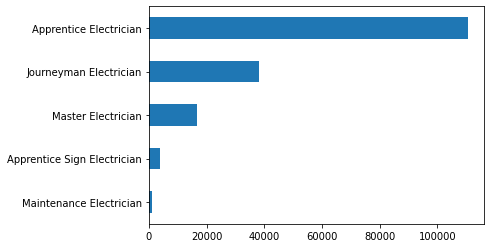

In [16]:
electricians.LICTYPE.value_counts().head(5).sort_values(ascending=True).plot(kind='barh')

## 12. How many sign electricians are there?

There are a few ways to do this one.

In [17]:
sign = electricians[electricians['LICTYPE'].str.contains('Sign')]
len(sign)

4927

# PART THREE: LOOKING AT LAST NAMES

## 13. Extract every owner's last name

You want everything before the comma. We've done this before (in a few different ways!).

* **Hint:** If you get an error about missing or `NaN` data, you might use `.fillna('')` to replace every empty owner name with an empty string. This might not happen to you, though, depending on how you do it!

* **Hint:** You probably want to do `expand=False` on your extraction to make sure it comes out as a series instead of a dataframe.

In [23]:
df.OWNER.str.extract("(.*),", expand=False)

0         RISINGER
1         WILLIAMS
2          GUEVARA
3           BOWERS
4           DEMSKY
            ...   
597811        ABEL
597812        GRAY
597813       MAYER
597814     FRIESEN
597815       BAUER
Name: OWNER, Length: 597816, dtype: object

## 14. Save the last name into a new column

Then check to make sure it exists, and you successfully saved it into the dataframe.

In [24]:
df['OWNER_LAST']= df.OWNER.str.extract("(.*),", expand=False)

In [25]:
df.head()

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,OWNER_LAST
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,2017-08-10,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N,RISINGER
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,2017-12-29,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N,WILLIAMS
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,2017-09-26,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N,GUEVARA
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,2017-11-04,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N,BOWERS
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2018-02-25,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N,DEMSKY


# 15. What are the ten most popular last names?

In [26]:
df.OWNER_LAST.value_counts().sort_values(ascending=False).head(10)

NGUYEN       22283
TRAN          8135
LE            5605
GARCIA        5574
MARTINEZ      4701
RODRIGUEZ     4625
HERNANDEZ     4389
PHAM          3996
GONZALEZ      3634
SMITH         3208
Name: OWNER_LAST, dtype: int64

## 16. What are the most popular licenses for people with the last name Nguyen? Tran? Le?

Those are the top 3 last names in Vietnam.

In [28]:
df[df.OWNER_LAST == 'NGUYEN'].LICTYPE.value_counts().head(10)

Cosmetology Manicurist             12855
Cosmetology Operator                4039
Cosmetology Esthetician             2881
Cosmetologist                       1874
Apprentice Electrician               195
A/C Technician                       169
Journeyman Electrician                55
Cosmetology Operator Instructor       48
Master Electrician                    25
Barber Manicurist                     25
Name: LICTYPE, dtype: int64

In [29]:
df[df.OWNER_LAST == 'TRAN'].LICTYPE.value_counts().head(10)

Cosmetology Manicurist             4674
Cosmetology Operator               1474
Cosmetology Esthetician            1032
Cosmetologist                       712
Apprentice Electrician               95
A/C Technician                       69
Journeyman Electrician               16
Cosmetology Operator Instructor      10
Barber Manicurist                     9
Barber, Class A                       7
Name: LICTYPE, dtype: int64

In [30]:
df[df.OWNER_LAST == 'LE'].LICTYPE.value_counts().head(10)

Cosmetology Manicurist             3276
Cosmetology Operator                953
Cosmetology Esthetician             730
Cosmetologist                       497
A/C Technician                       43
Apprentice Electrician               37
Journeyman Electrician               20
Cosmetology Operator Instructor      12
Barber, Class A                       7
Master Electrician                    6
Name: LICTYPE, dtype: int64

The background of this [is interesting](https://www.npr.org/2019/05/19/724452398/how-vietnamese-americans-took-over-the-nails-business-a-documentary) and [tragic](https://www.nytimes.com/2015/05/10/nyregion/at-nail-salons-in-nyc-manicurists-are-underpaid-and-unprotected.html).

## 17. Now do all of that in one line - most popular licenses for Nguyen, Tran and Le - without using `&`

In [34]:
df[df.OWNER_LAST.isin(['NGUYEN','TRAN','LE'])].LICTYPE.value_counts().head(10)

Cosmetology Manicurist             20805
Cosmetology Operator                6466
Cosmetology Esthetician             4643
Cosmetologist                       3083
Apprentice Electrician               327
A/C Technician                       281
Journeyman Electrician                91
Cosmetology Operator Instructor       70
Barber Manicurist                     37
Barber, Class A                       36
Name: LICTYPE, dtype: int64

## 19. Most popular license for anyone with a last name that ENDS in `-ko`

The answer is not `.str.contains('ko')`, but it isn't necessarily too different.

* One way involves a `.str.` method that check if a string ends with something,
* the other way involves a regular expression that has a "end of the string" marker (similar to how we've used `^` for the start of a string before)

If you're thinking about the latter, I might take a look at [this page](http://www.rexegg.com/regex-quickstart.html) under "Anchors and Boundaries". 

In [62]:
df[df.OWNER_LAST.str.endswith('KO', na=False)].LICTYPE.value_counts().head()

Cosmetology Operator                67
Apprentice Electrician              23
Journeyman Electrician              16
Legal Service Contract Sales Rep    11
A/C Technician                      11
Name: LICTYPE, dtype: int64

## 20. Get that as a percentage

In [64]:
df[df.OWNER_LAST.str.endswith('KO', na=False)].LICTYPE.value_counts(normalize=True)*100

Cosmetology Operator                            37.640449
Apprentice Electrician                          12.921348
Journeyman Electrician                           8.988764
Legal Service Contract Sales Rep                 6.179775
A/C Technician                                   6.179775
Cosmetology Esthetician                          5.056180
Cosmetology Hair Braider                         3.932584
Master Electrician                               3.932584
Cosmetology Operator Instructor                  2.247191
Cosmetology Manicurist                           2.247191
Maintenance Electrician                          1.685393
Barber, Class A                                  1.685393
Tow Truck Operator (Incident Management)         1.123596
Cosmetologist                                    0.561798
Property Tax Appraiser                           0.561798
Registered Accessibility Specialist              0.561798
Cosmetology Esthetic Instructor                  0.561798
Apprentice Sig

# PART FOUR: LOOKING AT FIRST NAMES

## 21. Extract the owner's first name

First, a little example of how regular expressions work with pandas.

In [65]:
# Build a dataframe
sample_df = pd.DataFrame([
    { 'name': 'Mary', 'sentence': "I am 90 years old" },
    { 'name': 'Jack', 'sentence': "I am 4 years old" },
    { 'name': 'Anne', 'sentence': "I am 27 years old" },
    { 'name': 'Joel', 'sentence': "I am 13 years old" },
])
# Look at the dataframe
sample_df

,name,sentence
0,Mary,I am 90 years old
1,Jack,I am 4 years old
2,Anne,I am 27 years old
3,Joel,I am 13 years old


In [67]:
# Given the sentence, "I am X years old", extract digits from the middle using ()
# Anything you put in () will be saved as an output.
# If you do expand=True it makes you a dataframe, but we don't want that.
sample_df['sentence'].str.extract("I am (\d+) years old", expand=False)

0    90
1     4
2    27
3    13
Name: sentence, dtype: object

In [66]:
# Save it into a new column
sample_df['age'] = sample_df['sentence'].str.extract("I am (\d+) years old", expand=False)
sample_df.head()

,name,sentence,age
0,Mary,I am 90 years old,90
1,Jack,I am 4 years old,4
2,Anne,I am 27 years old,27
3,Joel,I am 13 years old,13


**Now let's think about how we're going to extract the first names.** Begin by looking at a few full names.

In [68]:
df['OWNER'].head(10)

0        RISINGER, JIM MARVIN
1         WILLIAMS, JON ANDRE
2       GUEVARA, JUAN ANTONIO
3    BOWERS, JAMES BRISCOE II
4         DEMSKY, JOHN EDWARD
5           THOMPSON, RANDY D
6          TUCKER, MONTE EARL
7        COOPER, THOMAS JAMES
8     BLANKENSHIP, KERRY NEIL
9      DAWES, NICHOLAS MORGAN
Name: OWNER, dtype: object

What can you use to find the first name? It helps to say "this is to the left and this is to the right, and I'm going to take anything in the middle."

Once you figure out how to extract it, you can do a `.head(10)` to just look at the first few.

In [71]:
df.OWNER.str.extract(",\s(.*)\s", expand=False)

0                   JIM
1                   JON
2                  JUAN
3         JAMES BRISCOE
4                  JOHN
              ...      
597811           JUSTIN
597812          MATTHEW
597813            DAVID
597814        FRANCISCO
597815            DAVID
Name: OWNER, Length: 597816, dtype: object

## 22. Saving the owner's first name

Save the name to a new column, `FIRSTNAME`.

In [74]:
df['FIRSTNAME'] = df.OWNER.str.extract(",\s(.*)\s", expand=False)
df.head(30)

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,...,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,OWNER_LAST,FIRSTNAME
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,2017-08-10,"RISINGER, JIM MARVIN",...,NaN,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N,RISINGER,JIM
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,2017-12-29,"WILLIAMS, JON ANDRE",...,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N,WILLIAMS,JON
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,2017-09-26,"GUEVARA, JUAN ANTONIO",...,NaN,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N,GUEVARA,JUAN
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,2017-11-04,"BOWERS, JAMES BRISCOE II",...,NaN,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N,BOWERS,JAMES BRISCOE
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2018-02-25,"DEMSKY, JOHN EDWARD",...,NaN,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N,DEMSKY,JOHN
5,Associate Auctioneer,15650,OUT OF STATE,"THOMPSON, RANDY D",NaN,NaN,NaN,NaN,2017-05-04,"THOMPSON, RANDY D",...,NaN,RINGLING OK 73456,0999,OUT OF STATE,73456,5802765961,NaN,N,THOMPSON,RANDY
6,Associate Auctioneer,15698,OUT OF STATE,"TUCKER, MONTE EARL",NaN,NaN,NaN,NaN,2017-06-16,"TUCKER, MONTE EARL",...,NaN,SAYRE OK 73662-6080,0999,OUT OF STATE,73662,5802250269,NaN,N,TUCKER,MONTE
7,Associate Auctioneer,15810,MILAM,"COOPER, THOMAS JAMES",NaN,NaN,NaN,NaN,2017-03-18,"COOPER, THOMAS JAMES",...,NaN,ROSEBUD TX 76570,0145,FALLS,76570,2815078713,NaN,N,COOPER,THOMAS
8,Associate Auctioneer,15835,OUT OF STATE,"BLANKENSHIP, KERRY NEIL",NaN,NaN,NaN,NaN,2017-05-04,"BLANKENSHIP, KERRY NEIL",...,NaN,RINGLING OK 73456-2014,0999,OUT OF STATE,73456,5802765961,NaN,N,BLANKENSHIP,KERRY
9,Associate Auctioneer,16784,OUT OF STATE,"DAWES, NICHOLAS MORGAN",NaN,NaN,NaN,NaN,2017-10-19,"DAWES, NICHOLAS MORGAN",...,NaN,DALLAS TX 75219,0113,DALLAS,75219,2144091137,NaN,N,DAWES,NICHOLAS


# 23. Examine everyone without a first name

I purposefully didn't do a nicer regex in order to have some screwed-up results. **How many people are there without an entry in the first name column?**

Your numbers might be different than mine.

In [78]:
df.FIRSTNAME.isnull().value_counts()

False    385511
True     212305
Name: FIRSTNAME, dtype: int64

What do their names look like?

In [79]:
df[df.FIRSTNAME.isnull()]
# First names weren't extracted, but are listed in the OWNER column

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,...,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,OWNER_LAST,FIRSTNAME
29,Associate Auctioneer,17699,EL PASO,"MARTINEZ, ARTURO",NaN,NaN,NaN,NaN,2017-04-18,"MARTINEZ, ARTURO",...,NaN,EL PASO TX 79912-2104,0141,EL PASO,79912,9153733887,NaN,N,MARTINEZ,NaN
63,A/C Technician,104,TITUS,"VANGINAULT, FREDDY",NaN,NaN,NaN,NaN,2017-05-06,"VANGINAULT, FREDDY",...,NaN,NaN,NaN,TITUS,75455,NaN,CER,N,VANGINAULT,NaN
64,A/C Technician,105,UPSHUR,"VANSICKLE, MICHAEL",NaN,NaN,NaN,NaN,2017-05-17,"VANSICKLE, MICHAEL",...,NaN,NaN,NaN,UPSHUR,75644,NaN,CER,N,VANSICKLE,NaN
73,A/C Technician,143,HOPKINS,"COFFMAN, ERICK",NaN,NaN,NaN,NaN,2017-07-10,"COFFMAN, ERICK",...,NaN,NaN,NaN,HOPKINS,75437,NaN,REG,N,COFFMAN,NaN
76,A/C Technician,147,WILLIAMSON,"HUNTER, SCOTT",NaN,NaN,NaN,NaN,2018-01-23,"HUNTER, SCOTT",...,NaN,NaN,NaN,WILLIAMSON,78626,NaN,REG,N,HUNTER,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597723,Water Well Driller/Pump Installer,59637,DALLAS,"FIGUEROA, HIPOLITO",NaN,NaN,NaN,NaN,2017-02-01,"FIGUEROA, HIPOLITO",...,NaN,BOWIE TX 76230-2716,0337,MONTAGUE,76230,9408726633,W,N,FIGUEROA,NaN
597730,Water Well Driller/Pump Installer,59644,BEXAR,"GARZA, JESSIE",NaN,NaN,NaN,NaN,2018-02-22,"GARZA, JESSIE",...,NaN,SAN ANTONIO TX 78227-4204,0029,BEXAR,78227,2104347867,KPT,N,GARZA,NaN
597751,Water Well Driller/Pump Installer,59665,PECOS,"YANEZ, SALOMON",NaN,NaN,NaN,NaN,2017-05-03,"YANEZ, SALOMON",...,NaN,FORT STOCKTON TX 79735-1892,0371,PECOS,79735,4323367867,KP,N,YANEZ,NaN
597780,Water Well Driller/Pump Installer,59823,MIDLAND,"WILLEKE, JOSPEH",NaN,NaN,NaN,NaN,2017-08-23,"WILLEKE, JOSPEH",...,NaN,MIDLAND TX 79701-5118,0329,MIDLAND,79701,4327045376,W,N,WILLEKE,NaN


## 24. If it's a problem, you can fix it (if you'd like!)

Maybe you have another regular expression that works better with JUST these people? It really depends on how you've put together your previous regex!

If you'd like to use a separate regex for this group, you can use code like this:

`df.loc[df.FIRSTNAME.isnull(), 'FIRSTNAME'] = .....`

That will only set the `FIRSTNAME` for people where `FIRSTNAME` is null.

In [81]:
df.loc[df.FIRSTNAME.isnull(), 'FIRSTNAME'] = df.OWNER.str.extract(",\s(.*)", expand=False)

How many empty first names do we have now?

In [83]:
df.FIRSTNAME.isnull().value_counts()

False    515717
True      82099
Name: FIRSTNAME, dtype: int64

My code before only worked for people with middle names, but now it got people without middle names, too. Looking much better!

## 25. Most popular first names?

In [84]:
df.FIRSTNAME.value_counts().sort_values(ascending=False).head(10)

JOSE           6462
MICHAEL        5447
DAVID          4960
MARIA          4647
JAMES          4217
JUAN           3797
ROBERT         3791
JOHN           3777
CHRISTOPHER    3044
DANIEL         2866
Name: FIRSTNAME, dtype: int64

## 26. Most popular first names for a Cosmetology Operator, Cosmetology Esthetician, Cosmetologist, and anything that seems similar?

If you get an error about "cannot index vector containing NA / NaN values" remember `.fillna(False)` or `na=False` - if a row doesn't have a license, it doesn't give a `True`/`False`, so we force all of the empty rows to be `False`.

In [96]:
df[df.LICTYPE.str.startswith('Cosmet', na=False)].FIRSTNAME.value_counts().head(10)

MARIA        4169
JENNIFER     1884
JESSICA      1619
PHUONG       1429
THUY         1394
ASHLEY       1348
MARY         1339
AMANDA       1180
ELIZABETH    1179
KIMBERLY     1139
Name: FIRSTNAME, dtype: int64

## 27. Most popular first names for anything involving electricity?

In [101]:
df[df.LICTYPE.str.contains('Electric', na=False)].FIRSTNAME.value_counts().head(10)

JOSE           4676
MICHAEL        3264
DAVID          3053
JUAN           2739
JAMES          2513
ROBERT         2164
JOHN           2155
CHRISTOPHER    1905
DANIEL         1888
LUIS           1543
Name: FIRSTNAME, dtype: int64

## 28. Can we be any more obnoxious in this assignment?

A terrible thing that data analysts are often guilty of is using names to make assumptions about people. Beyond stereotypes involving last names, first names are often used to predict someone's race, ethnic background, or gender.

And if that isn't bad enough: if we were looking for Python libraries to do this sort of analysis, we'd come across [sex machine](https://github.com/ferhatelmas/sexmachine/). Once upon a time there was Ruby package named sex machine and everyone was like "come on are you six years old? is this how we do things?" and the guy was like "you're completely right I'm renaming it to [gender detector](https://github.com/bmuller/gender_detector)" and the world was Nice and Good again.

How'd it happen? [On Github, in a pull request!](https://github.com/bmuller/gender_detector/pull/14) Neat, right?

But yeah: apparently Python didn't get the message.

The sexmachine package doesn't work on Python 3 because it's from 300 BC, so we're going to use a Python 3 fork with the less problematic name [gender guesser](https://pypi.python.org/pypi/gender-guesser/).

#### Use `pip` or `pip3` to install gender-guesser.

In [102]:
!pip install gender-guesser

     |████████████████████████████████| 389kB 7.7MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


#### Run this code to test to see that it works

In [103]:
import gender_guesser.detector as gender

detector = gender.Detector(case_sensitive=False)
detector.get_gender('David')

'male'

In [104]:
detector.get_gender('Jose')

'male'

In [105]:
detector.get_gender('Maria')

'female'

#### Use it on a dataframe

To use something fancy like that on a dataframe, you use `.apply`. Check it out: 

In [106]:
df['FIRSTNAME'].fillna('').apply(lambda name: detector.get_gender(name)).head()

0       male
1       male
2       male
3    unknown
4       male
Name: FIRSTNAME, dtype: object

## 29. Calculate the gender of everyone's first name and save it to a column

Confirm by see how many people of each gender we have

In [110]:
df['FIRSTNAME'].fillna('').apply(lambda name: detector.get_gender(name)).value_counts()

male             208826
unknown          169859
female           145492
mostly_female     33024
mostly_male       24038
andy              16577
Name: FIRSTNAME, dtype: int64

In [112]:
df["GENDER"] = df['FIRSTNAME'].fillna('').apply(lambda name: detector.get_gender(name))
df.head()

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,...,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,OWNER_LAST,FIRSTNAME,GENDER
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,2017-08-10,"RISINGER, JIM MARVIN",...,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N,RISINGER,JIM,male
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,2017-12-29,"WILLIAMS, JON ANDRE",...,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N,WILLIAMS,JON,male
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,2017-09-26,"GUEVARA, JUAN ANTONIO",...,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N,GUEVARA,JUAN,male
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,2017-11-04,"BOWERS, JAMES BRISCOE II",...,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N,BOWERS,JAMES BRISCOE,unknown
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2018-02-25,"DEMSKY, JOHN EDWARD",...,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N,DEMSKY,JOHN,male


## 30. We like our data to be in tidy binary categories

* Combine the `mostly_female` into `female` 
* Combine the `mostly_male` into `male`
* Replace `andy` (androgynous) and `unknown` with `NaN`

you can get NaN not by making a string, but with `import numpy as np` and then using `np.nan`.

In [114]:
import numpy as np

In [118]:
df['GENDER'] = df.GENDER.replace({
    'mostly_female':'female',
    'mostly_male':'male',
    'andy':np.nan,
    'unknown':np.nan
})

In [119]:
df.GENDER.value_counts()

male      232864
female    178516
Name: GENDER, dtype: int64

## 31. Do men or women have more licenses? What is the percentage of unknown genders?

In [120]:
df.GENDER.value_counts(normalize=True)*100

male      56.605571
female    43.394429
Name: GENDER, dtype: float64

In [121]:
df.GENDER.isnull().value_counts(normalize=True)*100

False    68.813816
True     31.186184
Name: GENDER, dtype: float64

## 32. What are the popular unknown- or ambiguous gender first names?

Yours might be different! Mine is a combination of actual ambiguity, cultural bias and dirty data.

In [127]:
df[df.GENDER.isnull()].FIRSTNAME.value_counts().head(10)

THANH    985
DUNG     807
TRANG    771
INC      715
LINH     667
HONG     625
LAN      611
LLC      608
HUNG     473
YEN      456
Name: FIRSTNAME, dtype: int64

## 33. Manually check a few, too 

Using [a list of "gender-neutral baby names"](https://www.popsugar.com/family/Gender-Neutral-Baby-Names-34485564), pick a few names and check what results the library gives you.

In [136]:
df[df.FIRSTNAME == 'BLAKE'].GENDER.value_counts()

male    195
Name: GENDER, dtype: int64

In [134]:
df[df.FIRSTNAME == 'CASEY'].GENDER.isnull().value_counts()

True    340
Name: GENDER, dtype: int64

## 34. What are the most popular licenses for men? For women?

In [138]:
df[df.GENDER == 'male'].LICTYPE.value_counts().head(10)

Apprentice Electrician                      86648
Journeyman Electrician                      32258
A/C Technician                              22538
Master Electrician                          14302
Cosmetology Operator                        12945
Cosmetology Manicurist                       9528
Barber, Class A                              9236
Tow Truck Operator (Incident Management)     6169
Tow Truck Operator (Consent Tow)             5234
Legal Service Contract Sales Rep             5110
Name: LICTYPE, dtype: int64

In [139]:
df[df.GENDER == 'female'].LICTYPE.value_counts().head(10)

Cosmetology Operator                111573
Cosmetology Manicurist               19199
Cosmetology Esthetician              15562
Apprentice Electrician                4625
Legal Service Contract Sales Rep      4397
Cosmetology Operator Instructor       4326
Barber, Class A                       4036
Cosmetologist                         3570
VSF Employee                          1751
Property Tax Appraiser                1172
Name: LICTYPE, dtype: int64

## 35. What is the gender breakdown for Property Tax Appraiser? How about anything involving Tow Trucks?

If you're in need, remember your good friend `.fillna(False)` to get rid of NaN values, or `.na=False` with `.str.contains`.

In [146]:
df[df.LICTYPE.str.contains('Property Tax Appraiser', na=False)].GENDER.value_counts()

male      1389
female    1172
Name: GENDER, dtype: int64

In [145]:
df[df.LICTYPE.str.contains('Tow', na=False)].GENDER.value_counts()

male      15177
female      915
Name: GENDER, dtype: int64

(By the way, what are those tow truck jobs?)

In [147]:
df[df.LICTYPE.str.contains('Tow', na=False)]

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,...,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,OWNER_LAST,FIRSTNAME,GENDER
182021,Tow Operator CE Provider,1129,DENTON,AMERICAN CONTINUING EDUCATION LLC,NaN,NaN,NaN,NaN,2017-11-26,AMERICAN CONTINUING EDUCATION LLC,...,FLOWER MOUND TX 75028,0121,DENTON,75028,2142068547,Tow Operator,N,,NaN,NaN
182022,Tow Operator CE Provider,1201,OUT OF STATE,ELITE CME INC,NaN,NaN,NaN,NaN,2018-02-08,ELITE CME INC,...,ORMOND BEACH FL 32174,0999,OUT OF STATE,32174,8888576920,Tow Operator,N,,NaN,NaN
182023,Tow Operator CE Provider,1235,TRAVIS,ALL STAR TRAINING INC,NaN,NaN,NaN,NaN,2018-03-06,ALL STAR TRAINING INC,...,ADDISON TX 75001-6030,0113,DALLAS,75001,8173851136,Tow Operator,N,,NaN,NaN
182024,Tow Operator CE Provider,1298,HILL,ABBA TRAINING ONLINE,NaN,NaN,NaN,NaN,2018-02-09,ABBA TRAINING ONLINE,...,ABBOTT TX 76621-3180,0217,HILL,76621,8006807176,Tow Operator,N,,NaN,NaN
182025,Tow Operator CE Provider,1301,OUT OF STATE,TECES.ORG,NaN,NaN,NaN,NaN,2017-10-06,TECES.ORG,...,CINCINNATI OH 45244-1069,0999,OUT OF STATE,45244,8005060754,Tow Operator,N,,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585251,Tow Truck Operator (Incident Management),42068,VAN ZANDT,"RENEAU, BRADLEY A",NaN,NaN,NaN,NaN,2018-03-01,"RENEAU, BRADLEY A",...,CANTON,0467,VAN ZANDT,75103,NaN,IM,N,RENEAU,BRADLEY,male
585252,Tow Truck Operator (Incident Management),42069,HARRIS,"REZVANI-SIAN, PEYMAN",NaN,NaN,NaN,NaN,2018-03-01,"REZVANI-SIAN, PEYMAN",...,KATY,0201,HARRIS,77449,NaN,IM,N,REZVANI-SIAN,PEYMAN,male
585253,Tow Truck Operator (Consent Tow),42070,WILLIAMSON,"ESQUIVEL, FAUSTINO",NaN,NaN,NaN,NaN,2018-03-01,"ESQUIVEL, FAUSTINO",...,SAN ANTONIO,0029,BEXAR,78222,NaN,CT,N,ESQUIVEL,FAUSTINO,male
585254,Tow Truck Operator (Consent Tow),42071,HARRIS,"BARHOUM, LAITH A",NaN,NaN,NaN,NaN,2018-03-01,"BARHOUM, LAITH A",...,WEBSTER,0201,HARRIS,77598,NaN,CT,N,BARHOUM,LAITH,male


## 33. Graph them!

And let's **give them titles** so we know which is which.

<AxesSubplot:>

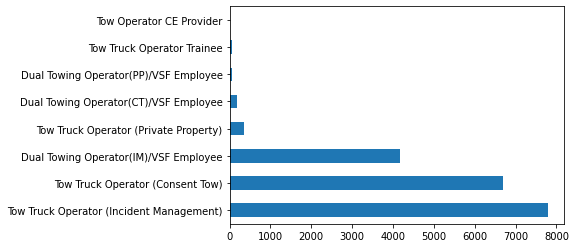

In [154]:
df[df.LICTYPE.str.contains('Tow', na=False)].LICTYPE.value_counts().plot(kind='barh')

## 34. Calcuate the supposed gender bias for profession

I spent like an hour on this and then realized a super easy way to do it. Welcome to programming! I'll do this part for you.

In [148]:
# So when you do .value_counts(), it gives you an index and a value
df[df['GENDER'] == 'male'].LICTYPE.value_counts().head()

Apprentice Electrician    86648
Journeyman Electrician    32258
A/C Technician            22538
Master Electrician        14302
Cosmetology Operator      12945
Name: LICTYPE, dtype: int64

We did `pd.concat` to combine dataframes, but you can also use it to combine series (like the results of `value_counts()`). If you give it a few `value_counts()` and give it some column names it'll make something real nice.

In [149]:
# All of the values_counts() we will be combining
vc_series = [
    df[df['GENDER'] == 'male'].LICTYPE.value_counts(),
    df[df['GENDER'] == 'female'].LICTYPE.value_counts(),
    df[df['GENDER'].isnull()].LICTYPE.value_counts()
]
# You need axis=1 so it combines them as columns
gender_df = pd.concat(vc_series, axis=1)
gender_df.head()

,LICTYPE,LICTYPE,LICTYPE
Apprentice Electrician,86648.0,4625.0,19320.0
Journeyman Electrician,32258.0,983.0,4929.0
A/C Technician,22538.0,841.0,4580.0
Master Electrician,14302.0,374.0,2134.0
Cosmetology Operator,12945.0,111573.0,26688.0


In [150]:
# Turn "A/C Contractor" etc into an actual column instead of an index
gender_df.reset_index(inplace=True)
gender_df.head()

,index,LICTYPE,LICTYPE,LICTYPE
0,Apprentice Electrician,86648.0,4625.0,19320.0
1,Journeyman Electrician,32258.0,983.0,4929.0
2,A/C Technician,22538.0,841.0,4580.0
3,Master Electrician,14302.0,374.0,2134.0
4,Cosmetology Operator,12945.0,111573.0,26688.0


In [151]:
# Rename the columns appropriately
gender_df.columns = ["license", "male", "female", "unknown"]
# Clean up the NaN by replacing them with zeroes
gender_df.fillna(0, inplace=True)
gender_df.head()

,license,male,female,unknown
0,Apprentice Electrician,86648.0,4625.0,19320.0
1,Journeyman Electrician,32258.0,983.0,4929.0
2,A/C Technician,22538.0,841.0,4580.0
3,Master Electrician,14302.0,374.0,2134.0
4,Cosmetology Operator,12945.0,111573.0,26688.0


## 35. Add new columns for total licenses, percent known (not percent unknown!), percent male (of known), percent female (of known)

And replace any `NaN`s with `0`.

In [162]:
gender_df.fillna(0)
gender_df.isnull().value_counts()

license  male   female  unknown
False    False  False   False      103
dtype: int64

In [170]:
gender_df['TOTAL'] = gender_df.sum(axis=1)
gender_df.head()

,license,male,female,unknown,TOTAL
0,Apprentice Electrician,86648.0,4625.0,19320.0,221186.0
1,Journeyman Electrician,32258.0,983.0,4929.0,76340.0
2,A/C Technician,22538.0,841.0,4580.0,55918.0
3,Master Electrician,14302.0,374.0,2134.0,33620.0
4,Cosmetology Operator,12945.0,111573.0,26688.0,302412.0


In [189]:
gender_df['PCT_KNOWN'] = ((gender_df[['male', 'female']].sum(axis=1))/gender_df['TOTAL'])*100

In [190]:
gender_df.head()

,license,male,female,unknown,TOTAL,PCT_KNOWN
0,Apprentice Electrician,86648.0,4625.0,19320.0,221186.0,41.265270
1,Journeyman Electrician,32258.0,983.0,4929.0,76340.0,43.543359
2,A/C Technician,22538.0,841.0,4580.0,55918.0,41.809435
3,Master Electrician,14302.0,374.0,2134.0,33620.0,43.652588
4,Cosmetology Operator,12945.0,111573.0,26688.0,302412.0,41.174953


In [200]:
gender_df['PCT_MALE'] = (gender_df['male']/gender_df[['male','female']].sum(axis=1))*100
gender_df.head()

,license,male,female,unknown,TOTAL,PCT_KNOWN,PCT_MALE
0,Apprentice Electrician,86648.0,4625.0,19320.0,221186.0,41.265270,94.932784
1,Journeyman Electrician,32258.0,983.0,4929.0,76340.0,43.543359,97.042809
2,A/C Technician,22538.0,841.0,4580.0,55918.0,41.809435,96.402755
3,Master Electrician,14302.0,374.0,2134.0,33620.0,43.652588,97.451622
4,Cosmetology Operator,12945.0,111573.0,26688.0,302412.0,41.174953,10.396087


In [205]:
gender_df['PCT_FEMALE'] = (gender_df['female']/gender_df[['male','female']].sum(axis=1))*100
gender_df.head(50)

,license,male,female,unknown,TOTAL,PCT_KNOWN,PCT_MALE,PCT_FEMALE
0,Apprentice Electrician,86648.0,4625.0,19320.0,221186.0,41.265270,94.932784,5.067216
1,Journeyman Electrician,32258.0,983.0,4929.0,76340.0,43.543359,97.042809,2.957191
2,A/C Technician,22538.0,841.0,4580.0,55918.0,41.809435,96.402755,3.597245
3,Master Electrician,14302.0,374.0,2134.0,33620.0,43.652588,97.451622,2.548378
4,Cosmetology Operator,12945.0,111573.0,26688.0,302412.0,41.174953,10.396087,89.603913
5,Cosmetology Manicurist,9528.0,19199.0,20836.0,99126.0,28.980288,33.167403,66.832597
6,"Barber, Class A",9236.0,4036.0,2747.0,32038.0,41.425807,69.590115,30.409885
7,Tow Truck Operator (Incident Management),6169.0,331.0,1304.0,15608.0,41.645310,94.907692,5.092308
8,Tow Truck Operator (Consent Tow),5234.0,268.0,1201.0,13406.0,41.041325,95.129044,4.870956
9,Legal Service Contract Sales Rep,5110.0,4397.0,1929.0,22872.0,41.566107,53.749869,46.250131


## 35. What 10 licenses with more than 2,000 people and over 75% "known" gender has the most male owners? The most female?

In [219]:
# It doesn't appear that I have any PCT_KNOWNS over 75, so I changed to 40 for the purposes of this exercise. I'm assuming I messed something up at one point.. 

gender_df[(gender_df.TOTAL > 2000) & (gender_df.PCT_KNOWN > 40)].value_counts()




license                                   male     female    unknown  TOTAL     PCT_KNOWN  PCT_MALE   PCT_FEMALE
Water Well Driller/Pump Installer         1495.0   48.0      205.0    3496.0    44.136156  96.889177  3.110823      1
VSF Employee                              1280.0   1751.0    459.0    6980.0    43.424069  42.230287  57.769713     1
Appliance Installer                       1636.0   61.0      263.0    3920.0    43.290816  96.405421  3.594579      1
Apprentice Electrician                    86648.0  4625.0    19320.0  221186.0  41.265270  94.932784  5.067216      1
Auctioneer                                1788.0   308.0     284.0    4760.0    44.033613  85.305344  14.694656     1
Barber, Class A                           9236.0   4036.0    2747.0   32038.0   41.425807  69.590115  30.409885     1
Cosmetology Operator                      12945.0  111573.0  26688.0  302412.0  41.174953  10.396087  89.603913     1
Cosmetology Operator Instructor           524.0    4326.0    

## 36. Let's say you have to call a few people about being in a profession dominated by the other gender. What are their phone numbers?

This will involve doing some research in one dataframe, then the other one. I didn't put an answer here because I'm interested in what you come up with!

## Okay, let's take a break for a second.

We've been diving pretty deep into this gender stuff after an initial "oh but it's not great" kind of thing.

**What issues might come up with our analysis?** Some might be about ethics or discrimination, while some might be about our analysis being misleading or wrong. Go back and take a critical look at what we've done since we started working on gender, and summarize your thoughts below.

If you found problems with our analysis, **how could we make improvements?**

## PART FIVE: Violations

### 37. Read in **violations.csv** as `violations_df`, make sure it looks right

In [173]:
violations_df = pd.read_csv("violations.csv")
violations_df.head()

,basis,city,complaintno,county,licenseno,name,order,orderDate,zipcode
0,Respondent failed to keep a record of the date...,HOUSTON,COS20160024894,HARRIS,748459,"NGUYEN, PHUONG T",Respondent is assessed an administrative penal...,3/21/2017,77083
1,Respondent failed to keep a record of the date...,HOUSTON,COS20170004646,HARRIS,742837,"NGUYEN, SUYEN THI",Respondent is assessed an administrative penal...,3/21/2017,77072
2,Respondent failed to maintain the required cle...,HOUSTON,COS20170007996,HARRIS,729680,"NGUYEN, XUONG MY",Respondent is assessed an administrative penal...,3/21/2017,77066
3,Respondent failed to keep a record of the date...,HOUSTON,COS20170003822,HARRIS,688518,"NGUYEN, NHUNG TUYET",Respondent is assessed an administrative penal...,3/8/2017,77083
4,The Respondent's license was revoked upon Resp...,HOUSTON,COS20170005470,HARRIS,1209580,"NGUYEN, QUAN M",Respondent's Cosmetology Operator license was ...,2/24/2017,77077


### 38. Combine with your original licenses dataset dataframe to get phone numbers and addresses for each violation. Check that it is 90 rows, 28 columns.

In [178]:
license_df = df.merge(violations_df, left_on='LICNUMBER', right_on='licenseno')

In [181]:
license_df.shape

(90, 31)

## 39. Find each violation involving a failure with records. Use a regular expression.

## 40. How much money was each fine? Use a regular expression and .str.extract

Unfortunately large and helpful troubleshooting tip: `$` means "end of a line" in regex, so `.extract` isn't going to accept it as a dollar sign. You need to escape it by using `\$` instead.

## 41. Clean those results (no commas, no dollar signs, and it should be an integer) and save it to a new column called `fine`

`.replace` is for *entire cells*, you're interested in `.str.replace`, which treats each value like a string, not like a... pandas thing.

`.astype(int)` will convert it into an integer for you.

## 42. Which orders results in the top fines?

## 43. Are you still here???

I'm sure impressed.